**Monte Carlo Simulation using Python**

The Dice Game

Our simple game will involve two six-sided dice. In order to win, the player needs to roll the same number on both dice. A six-sided die has six possible outcomes (1, 2, 3, 4, 5, and 6). With two dice, there is now 36 possible outcomes (1 and 1, 1 and 2, 1 and 3, etc., or 6 x 6 = 36 possibilities). In this game, the house has more opportunities to win (30 outcomes vs. the player’s 6 outcomes), meaning the house has the quite the advantage.

Let’s say our player starts with a balance of 1,000usd and is prepared to lose it all, so they bet 1usd on every roll (meaning both dice are rolled) and decide to play 1,000 rolls. Because the house is so generous, they offer to payout 4 times the player’s bet when the player wins. For example, if the player wins the first roll, their balance increases by 4usd, and they end the round with a balance of 1,004usd. If they miraculously went on a 1,000 roll win-streak, they could go home with $5,000. If they lost every round, they could go home with nothing. Not a bad risk-reward ratio… or maybe it is.


In [2]:
# Importing Packages
import matplotlib.pyplot as plt
import random

Dice Roll Function

In [3]:
# Creating Roll Dice Function
def roll_dice():
    die_1 = random.randint(1, 6)
    die_2 = random.randint(1, 6)

    # Determining if the dice are the same number
    if die_1 == die_2:
        same_num = True
    else:
        same_num = False
    return same_num

Inputs and Tracking Variables



Every Monte Carlo simulation will require you to know what your inputs are and what information you are looking to obtain. We already defined what our inputs are when we described the game. We said our number of rolls per game is 1,000, and the amount the player will be betting each roll is $1. **In addition to our input variables, we need to define how many times we want to simulate the game. We can use the num_simulations variable as our Monte Carlo simulation count.** The higher we make this number, the more accurate the predicted probability is to its true value.

We will track the win probability (wins per game divided by the total number of rolls) and ending balance for each simulation (or game). These are initialized as lists and will be updated at the end of each game.

In [4]:
# Inputs
num_simulations = 10000
max_num_rolls = 1000
bet = 1

# Tracking
win_probability = []
end_balance = []

**Setting up Figure**



The next step is setting up our figure before running through the simulation. By doing this prior to the simulation, it allows us to add lines to our figure after each game.

(0.0, 1000.0)

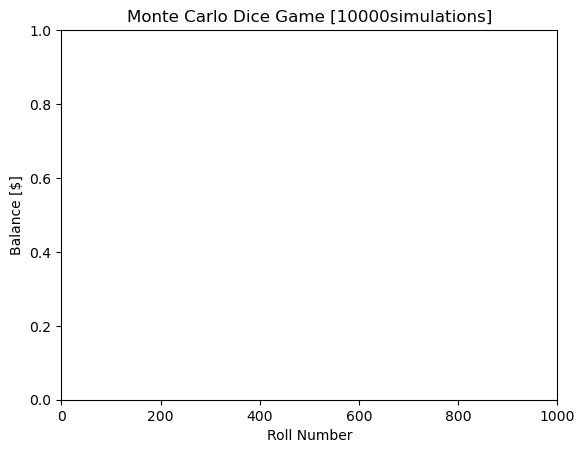

In [5]:
# Creating Figure for Simulation Balances
fig = plt.figure()
plt.title("Monte Carlo Dice Game [" + str(num_simulations) + "simulations]")
plt.xlabel("Roll Number")
plt.ylabel("Balance [$]")
plt.xlim([0, max_num_rolls])

**Monte Carlo Simulation**



In the code below, we have an outer for loop that iterates through our pre-defined number of simulations (10,000 simulations) and a nested while loop that runs each game (1,000 rolls). Before we start each while loop, we initialize:
- the player’s balance as $1,000 (as a list for plotting purposes) 
- a count for rolls and wins.

The **while loop** will simulate the game for 1,000 rolls. Inside this loop, we roll the dice and use the Boolean variable returned from roll_dice() to determine the outcome.
- If the dice are the same number, we add 4 times the bet to the balance list and add a win to the win count.
- If the dice are different, we subtract the bet from the balance list. At the end of each roll, we add a count to our **num_rolls** list.

Once the number of rolls hits 1,000, we can calculate the player’s win probability as the number of wins divided by the total number of rolls. We can also store the ending balance for the completed game in the tracking variable **end_balance**.

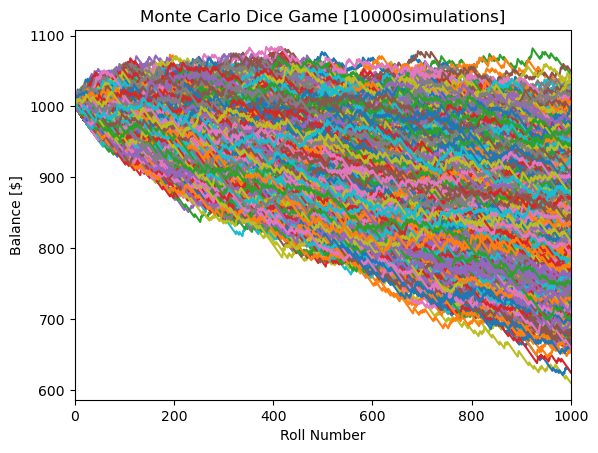

In [6]:
# For loop to run for the number of simulations desired
for i in range(num_simulations):
    balance = [1000]
    num_rolls = [0]
    num_wins = 0    # Run until the player has rolled 1,000 times
    while num_rolls[-1] < max_num_rolls:
        same = roll_dice()        # Result if the dice are the same number
        if same:
            balance.append(balance[-1] + 4 * bet) #Access the last number in the list (balance) and add the profit.
            num_wins += 1
        # Result if the dice are different numbers
        else:
            balance.append(balance[-1] - bet)

        num_rolls.append(num_rolls[-1] + 1)# Store tracking variables and add line to figure
    win_probability.append(num_wins/num_rolls[-1])
    end_balance.append(balance[-1])
    plt.plot(num_rolls, balance)
    plt.title("Monte Carlo Dice Game [" + str(num_simulations) + "simulations]")
    plt.xlabel("Roll Number")
    plt.ylabel("Balance [$]")
    plt.xlim([0, max_num_rolls])

In [7]:
# Averaging win probability and end balance
overall_win_probability = sum(win_probability)/len(win_probability)
overall_end_balance = sum(end_balance)/len(end_balance)# Displaying the averages
print("Average win probability after " + str(num_simulations) + " runs: " + str(overall_win_probability))
print("Average ending balance after " + str(num_simulations) + " runs: $" + str(overall_end_balance))

Average win probability after 10000 runs: 0.16673459999999965
Average ending balance after 10000 runs: $833.673


In [8]:
len(win_probability)

10000

**Analyzing Results**


From our figure, we can determine that the player rarely makes a profit after 1,000 rolls. In fact, the average ending balance of our 10,000 simulations is $833.66 (your results may be slightly different due to randomization). So, even though the house was “generous” in paying out 4 times our bet when the player won, the house still came out on top.

Our win probability is about 0.1667, or approximately 1/6. 

Returning back, we noted that the player had 6 outcomes in which they could win. We also noted there are 36 possible rolls. Using these two numbers, we would expect that the player would win 6 out of 36 rolls, or 1/6 rolls, which matches our Monte Carlo prediction.